In [10]:
import random
import torch
from torch.distributions.multinomial import Multinomial
import matplotlib.pyplot as plt
from d2l import torch as d2l

Statistics are empirical quantities that are computed as functions of the observed data. 

We often design special statistics called **estimators** that, given a dataset, produce estimates of model parameters such as probabilities.

Moreover, when those estimators satisfy a nice property called *consistency*, our estimates will converge to the corresponding probability.

Drawing realizations from some underlying random process is called **sampling**

In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for i_ in range(num_tosses)])
tails = num_tosses - heads
print("heads,tails:", [heads, tails])

heads,tails: [50, 50]


More generally, we can simulate multiple draws from any variable with a finite number of possible outcomes by calling the multinomial function setting the first argument to the number of draws and the second as a list of probabilities associated with each of the possible outcomes.

In [3]:
fair_probs = torch.tensor([0.5,0.5])
Multinomial(100,fair_probs).sample()

tensor([63., 37.])

In [4]:
Multinomial(100,fair_probs).sample() / 100

tensor([0.4400, 0.5600])

How could we know if the simulation or the probabilites are skewed or the possible deviation from theoritical probabilites was just an artifact of the small sample size?

In [5]:
Multinomial(100000, fair_probs).sample() / 100000

tensor([0.4994, 0.5006])

In general, for averages of repeated events, as the number of repetitions grows, our estimates are guaranteed to converge to the true underlying probabilites.

THis mathematical formulation of this phenomenon is called the law of *large numbers* and the **central limit theorem** tells us that in many situations, as the sample size n grows, these errors should go down at a rate of (1/n^0.5)

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [0., 1.]])


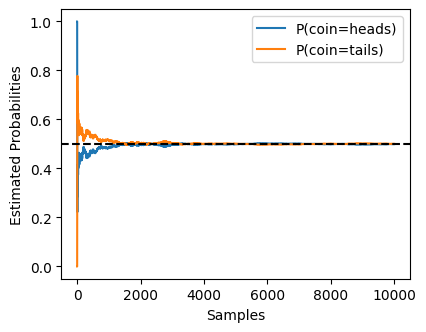

In [12]:
counts = Multinomial(1,fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
print(counts)
estimates = cum_counts/cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

import matplotlib.pyplot as plt

plt.figure(figsize=(4.5, 3.5))
plt.plot(estimates[:, 0], label="P(coin=heads)")
plt.plot(estimates[:, 1], label="P(coin=tails)")
plt.axhline(y=0.5, color="black", linestyle="dashed")
plt.xlabel("Samples")
plt.ylabel("Estimated Probabilities")
plt.legend()
plt.show()